In [39]:
import easygui
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
train=easygui.fileopenbox()

In [13]:
train

'C:\\Users\\yashw\\Downloads\\store_forecasting_data (1) (1)\\store_forecasting_data\\train.csv'

In [65]:
oil=easygui.fileopenbox()

In [112]:
oil_df=pd.read_csv(oil)

In [45]:
transactions=easygui.fileopenbox()

In [78]:
trans_df=pd.read_csv(transactions)

In [49]:
stores=easygui.fileopenbox()

In [76]:
store_df=pd.read_csv(stores)

In [53]:
holidays=easygui.fileopenbox()

In [80]:
holidays_df=pd.read_csv(holidays)

In [25]:
train_df=pd.read_csv(train)

In [26]:
train_df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [33]:
train_df.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [37]:
train_df.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [57]:
train_df.head(2)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0


In [393]:
oil_df.head(10)

,date,dcoilwtico
0,2013-01-01,93.14
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21
6,2013-01-09,93.08
7,2013-01-10,93.81
8,2013-01-11,93.60
9,2013-01-14,94.27


<Axes: xlabel='date', ylabel='dcoilwtico'>

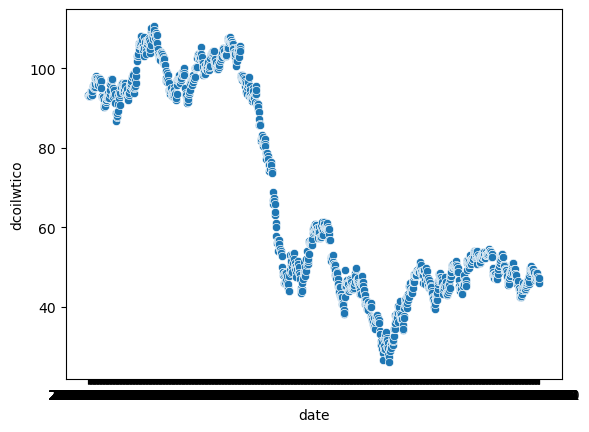

In [116]:
sns.scatterplot(x=oil_df['date'],y=oil_df['dcoilwtico'])

In [ ]:
#Since we are using oil prices we can use linear interpolation method

In [118]:
oil_df['dcoilwtico'] = oil_df['dcoilwtico'].interpolate(method='linear')


In [124]:
oil_df.isna().sum()

date          0
dcoilwtico    0
dtype: int64

In [122]:
#After using linear interpolation we can fill first value using backward fill
oil_df['dcoilwtico'] = oil_df['dcoilwtico'].fillna(method='bfill')

<Axes: xlabel='date', ylabel='dcoilwtico'>

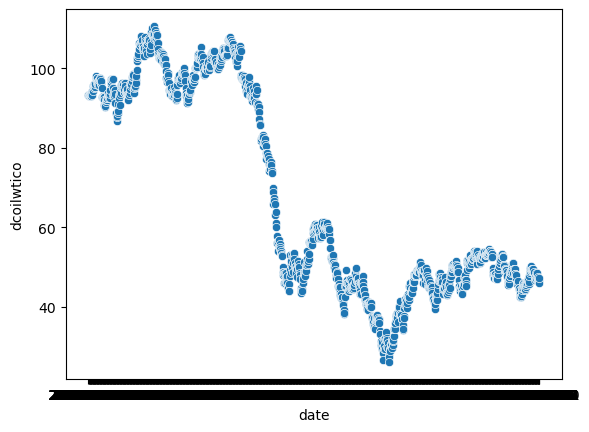

In [126]:
sns.scatterplot(x=oil_df['date'],y=oil_df['dcoilwtico'])

In [128]:
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1218 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [ ]:
#We should convert to proper date time format

In [134]:
oil_df['date']=pd.to_datetime(oil_df['date'])

In [136]:
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1218 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [257]:
oil_df

,date,dcoilwtico
0,2013-01-01,93.14
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [94]:
store_df.head(2)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13


In [263]:
oil_df.isnull().sum()

date          0
dcoilwtico    0
dtype: int64

In [144]:
holidays_df.head(100)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
95,2014-03-04,Holiday,National,Ecuador,Carnaval,False
96,2014-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
97,2014-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
98,2014-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False


In [162]:
holidays_df[holidays_df['locale']=='National'].count()

date           174
type           174
locale         174
locale_name    174
description    174
transferred    174
dtype: int64

In [ ]:
# Im taking only national holidays as every store would not be working on that day 
# and considering holidays and events only

In [216]:
holidays= holidays_df[(holidays_df['transferred'] == False) & 
(holidays_df['type'].isin(['Holiday']))].drop_duplicates(subset=['date', 'locale', 'description'])


In [222]:
holidays['date']=pd.to_datetime(holidays['date'])

In [224]:
national = holidays[holidays['locale'] == 'National'][['date']]
regional = holidays[holidays['locale'] == 'Regional'][['date', 'locale_name']]
local = holidays[holidays['locale'] == 'Local'][['date', 'locale_name']]


In [239]:
train_final['is_national_holiday'] = train_final['date'].isin(national['date']).astype(int)


In [244]:
#using vectorization method for faster code execution

regional['region_key'] = list(zip(regional['date'], regional['locale_name']))
local['local_key'] = list(zip(local['date'], local['locale_name']))

train_final['region_key'] = list(zip(train_final['date'], train_final['state']))
train_final['local_key'] = list(zip(train_final['date'], train_final['city']))

train_final['is_regional_holiday'] = train_final['region_key'].isin(regional['region_key']).astype(int)
train_final['is_local_holiday'] = train_final['local_key'].isin(local['local_key']).astype(int)

In [ ]:
train_final.drop(columns=['region_key', 'local_key'], inplace=True)


In [196]:
store_df

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [200]:
train_df['date']=pd.to_datetime(train_df['date'])

In [202]:
# Merged train with store number
train_final = train_df.merge(store_df, on='store_nbr', how='left')

# Merged with oil prices on date
train_final = train_final.merge(oil_df, on='date', how='left')

In [246]:
train_final

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,is_national_holiday,is_regional_holiday,is_local_holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,93.14,1,0,0
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,93.14,1,0,0
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,93.14,1,0,0
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,93.14,1,0,0
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,93.14,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,47.57,0,0,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,47.57,0,0,0
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,47.57,0,0,0
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,47.57,0,0,0


In [267]:
train_final.isnull().sum()

id                     0
date                   0
store_nbr              0
family                 0
sales                  0
onpromotion            0
city                   0
state                  0
type                   0
cluster                0
dcoilwtico             0
is_national_holiday    0
is_regional_holiday    0
is_local_holiday       0
dtype: int64

In [265]:
train_final['dcoilwtico'] = train_final['dcoilwtico'].interpolate(method='linear')
train_final['dcoilwtico'] = train_final['dcoilwtico'].fillna(method='bfill').fillna(method='ffill')


In [289]:
a=train_final[train_final.duplicated(subset='id')]

In [291]:
a

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,is_national_holiday,is_regional_holiday,is_local_holiday


In [295]:
train_final[train_final['id'].duplicated()]

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,is_national_holiday,is_regional_holiday,is_local_holiday


In [299]:
train_final['month']=train_final['date'].dt.month

In [309]:
train_final

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,...,is_regional_holiday,is_local_holiday,month,year,day,week,day_of_week,is_weekend,is_month_start,is_month_end
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,...,0,0,1,2013,1,1,1,0,1,0
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,...,0,0,1,2013,1,1,1,0,1,0
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,...,0,0,1,2013,1,1,1,0,1,0
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,...,0,0,1,2013,1,1,1,0,1,0
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,...,0,0,1,2013,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,...,0,0,8,2017,15,33,1,0,0,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,...,0,0,8,2017,15,33,1,0,0,0
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,...,0,0,8,2017,15,33,1,0,0,0
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,...,0,0,8,2017,15,33,1,0,0,0


In [303]:
train_final['year']=train_final['date'].dt.year

In [307]:
train_final['day'] = train_final['date'].dt.day
train_final['week'] = train_final['date'].dt.isocalendar().week.astype(int)
train_final['day_of_week'] = train_final['date'].dt.dayofweek
train_final['is_weekend'] = train_final['day_of_week'].isin([5, 6]).astype(int)
train_final['is_month_start'] = train_final['date'].dt.is_month_start.astype(int)
train_final['is_month_end'] = train_final['date'].dt.is_month_end.astype(int)


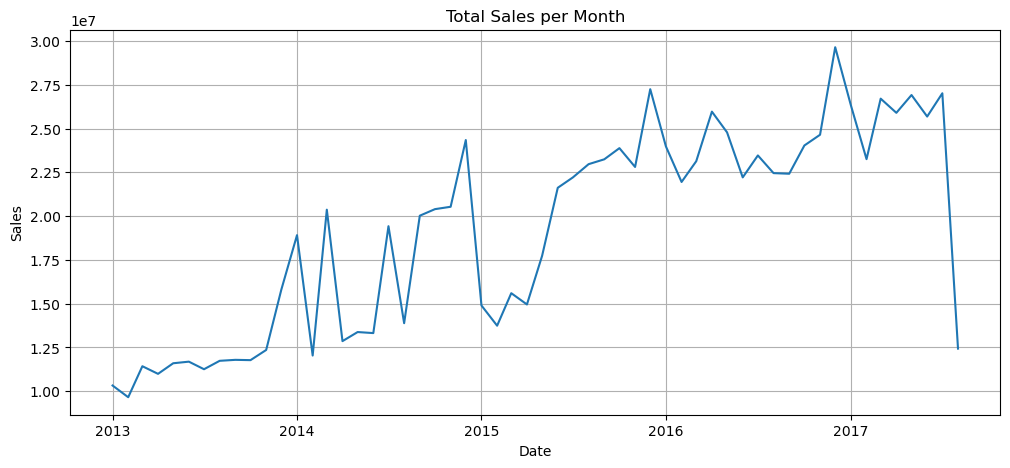

In [311]:
monthly_trend = train_final.groupby(['year', 'month'])['sales'].sum().reset_index()
monthly_trend['date'] = pd.to_datetime(monthly_trend[['year', 'month']].assign(day=1))

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.plot(monthly_trend['date'], monthly_trend['sales'])
plt.title("Total Sales per Month")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


In [313]:
# Payday: 15th and last day of the month
train_final['is_payday'] = train_final['day'].isin([15]) | (train_final['date'] == train_final['date'] + pd.offsets.MonthEnd(0))

# Earthquake: April 16, 2016
train_final['earthquake'] = (train_final['date'] == pd.Timestamp("2016-04-16")).astype(int)


In [315]:
train_final

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,...,month,year,day,week,day_of_week,is_weekend,is_month_start,is_month_end,is_payday,earthquake
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,...,1,2013,1,1,1,0,1,0,False,0
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,...,1,2013,1,1,1,0,1,0,False,0
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,...,1,2013,1,1,1,0,1,0,False,0
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,...,1,2013,1,1,1,0,1,0,False,0
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,...,1,2013,1,1,1,0,1,0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,...,8,2017,15,33,1,0,0,0,True,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,...,8,2017,15,33,1,0,0,0,True,0
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,...,8,2017,15,33,1,0,0,0,True,0
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,...,8,2017,15,33,1,0,0,0,True,0


In [318]:
# Sort before creating rolling features
train_final = train_final.sort_values(by=['store_nbr', 'family', 'date'])

# Lags
train_final['lag_7'] = train_final.groupby(['store_nbr', 'family'])['sales'].shift(7)
train_final['lag_30'] = train_final.groupby(['store_nbr', 'family'])['sales'].shift(30)

# Rolling mean and std
train_final['rolling_mean_7'] = train_final.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.shift(1).rolling(window=7).mean())
train_final['rolling_std_7'] = train_final.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.shift(1).rolling(window=7).std())

train_final['rolling_mean_30'] = train_final.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.shift(1).rolling(window=30).mean())


In [322]:
train_final

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,...,is_weekend,is_month_start,is_month_end,is_payday,earthquake,lag_7,lag_30,rolling_mean_7,rolling_std_7,rolling_mean_30
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,...,0,1,0,False,0,NaN,NaN,NaN,NaN,NaN
1782,1782,2013-01-02,1,AUTOMOTIVE,2.0,0,Quito,Pichincha,D,13,...,0,0,0,False,0,NaN,NaN,NaN,NaN,NaN
3564,3564,2013-01-03,1,AUTOMOTIVE,3.0,0,Quito,Pichincha,D,13,...,0,0,0,False,0,NaN,NaN,NaN,NaN,NaN
5346,5346,2013-01-04,1,AUTOMOTIVE,3.0,0,Quito,Pichincha,D,13,...,0,0,0,False,0,NaN,NaN,NaN,NaN,NaN
7128,7128,2013-01-05,1,AUTOMOTIVE,5.0,0,Quito,Pichincha,D,13,...,1,0,0,False,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993627,2993627,2017-08-11,54,SEAFOOD,0.0,0,El Carmen,Manabi,C,3,...,0,0,0,False,0,0.0,1.0,3.000000,4.281744,2.966667
2995409,2995409,2017-08-12,54,SEAFOOD,1.0,1,El Carmen,Manabi,C,3,...,1,0,0,False,0,3.0,0.0,3.000000,4.281744,2.933333
2997191,2997191,2017-08-13,54,SEAFOOD,2.0,0,El Carmen,Manabi,C,3,...,1,0,0,False,0,0.0,0.0,2.714286,4.347961,2.966667
2998973,2998973,2017-08-14,54,SEAFOOD,0.0,0,El Carmen,Manabi,C,3,...,0,0,0,False,0,0.0,2.0,3.000000,4.203173,3.033333


In [330]:
train_final = train_final.dropna(subset=['lag_7', 'lag_30', 'rolling_mean_7', 'rolling_std_7', 'rolling_mean_30'])


In [331]:
train_final

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,...,is_weekend,is_month_start,is_month_end,is_payday,earthquake,lag_7,lag_30,rolling_mean_7,rolling_std_7,rolling_mean_30
53460,53460,2013-01-31,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,...,0,0,1,True,0,0.0,0.0,3.142857,2.035401,2.266667
55242,55242,2013-02-01,1,AUTOMOTIVE,3.0,0,Quito,Pichincha,D,13,...,0,1,0,False,0,5.0,2.0,3.142857,2.035401,2.266667
57024,57024,2013-02-02,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,...,1,0,0,False,0,4.0,3.0,2.857143,1.864454,2.300000
58806,58806,2013-02-03,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,...,1,0,0,False,0,2.0,3.0,2.285714,2.058663,2.200000
60588,60588,2013-02-04,1,AUTOMOTIVE,5.0,0,Quito,Pichincha,D,13,...,0,0,0,False,0,3.0,5.0,2.000000,2.236068,2.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993627,2993627,2017-08-11,54,SEAFOOD,0.0,0,El Carmen,Manabi,C,3,...,0,0,0,False,0,0.0,1.0,3.000000,4.281744,2.966667
2995409,2995409,2017-08-12,54,SEAFOOD,1.0,1,El Carmen,Manabi,C,3,...,1,0,0,False,0,3.0,0.0,3.000000,4.281744,2.933333
2997191,2997191,2017-08-13,54,SEAFOOD,2.0,0,El Carmen,Manabi,C,3,...,1,0,0,False,0,0.0,0.0,2.714286,4.347961,2.966667
2998973,2998973,2017-08-14,54,SEAFOOD,0.0,0,El Carmen,Manabi,C,3,...,0,0,0,False,0,0.0,2.0,3.000000,4.203173,3.033333


In [334]:
store_type_avg = train_final.groupby('type')['sales'].mean().reset_index().rename(columns={'sales': 'avg_sales_by_type'})
train_final = train_final.merge(store_type_avg, on='type', how='left')


In [339]:
# Total sales by cluster and family
top_families = train_final.groupby(['cluster', 'family'])['sales'].sum().reset_index()

# Rank and filter top 3
top_families['rank'] = top_families.groupby('cluster')['sales'].rank(method='first', ascending=False)
top_families = top_families[top_families['rank'] <= 3][['cluster', 'family']]



In [ ]:
# Flag if this row's family is a top seller in the cluster
train_final['top_family_in_cluster'] = train_final[['cluster', 'family']].apply(lambda row: 1 if ((row['cluster'], row['family']) in top_families.set_index(['cluster', 'family']).index) else 0,axis=1)



In [341]:
# Group total sales per cluster-family
top_families = train_final.groupby(['cluster', 'family'])['sales'].sum().reset_index()

# Rank by total sales within each cluster
top_families['rank'] = top_families.groupby('cluster')['sales'].rank(method='first', ascending=False)

# Keep top 3
top_families = top_families[top_families['rank'] <= 3][['cluster', 'family']]


In [343]:
# Create a key for lookup
top_keys = set(zip(top_families['cluster'], top_families['family']))
train_final['top_family_in_cluster'] = list(zip(train_final['cluster'], train_final['family']))
train_final['top_family_in_cluster'] = train_final['top_family_in_cluster'].isin(top_keys).astype(int)


In [345]:
train_final

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,...,is_month_end,is_payday,earthquake,lag_7,lag_30,rolling_mean_7,rolling_std_7,rolling_mean_30,avg_sales_by_type,top_family_in_cluster
0,53460,2013-01-31,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,...,1,True,0,0.0,0.0,3.142857,2.035401,2.266667,353.858624,0
1,55242,2013-02-01,1,AUTOMOTIVE,3.0,0,Quito,Pichincha,D,13,...,0,False,0,5.0,2.0,3.142857,2.035401,2.266667,353.858624,0
2,57024,2013-02-02,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,...,0,False,0,4.0,3.0,2.857143,1.864454,2.300000,353.858624,0
3,58806,2013-02-03,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,...,0,False,0,2.0,3.0,2.285714,2.058663,2.200000,353.858624,0
4,60588,2013-02-04,1,AUTOMOTIVE,5.0,0,Quito,Pichincha,D,13,...,0,False,0,3.0,5.0,2.000000,2.236068,2.100000,353.858624,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947423,2993627,2017-08-11,54,SEAFOOD,0.0,0,El Carmen,Manabi,C,3,...,0,False,0,0.0,1.0,3.000000,4.281744,2.966667,198.856088,0
2947424,2995409,2017-08-12,54,SEAFOOD,1.0,1,El Carmen,Manabi,C,3,...,0,False,0,3.0,0.0,3.000000,4.281744,2.933333,198.856088,0
2947425,2997191,2017-08-13,54,SEAFOOD,2.0,0,El Carmen,Manabi,C,3,...,0,False,0,0.0,0.0,2.714286,4.347961,2.966667,198.856088,0
2947426,2998973,2017-08-14,54,SEAFOOD,0.0,0,El Carmen,Manabi,C,3,...,0,False,0,0.0,2.0,3.000000,4.203173,3.033333,198.856088,0


In [349]:
train_final['top_family_in_cluster'].unique()

array([0, 1])

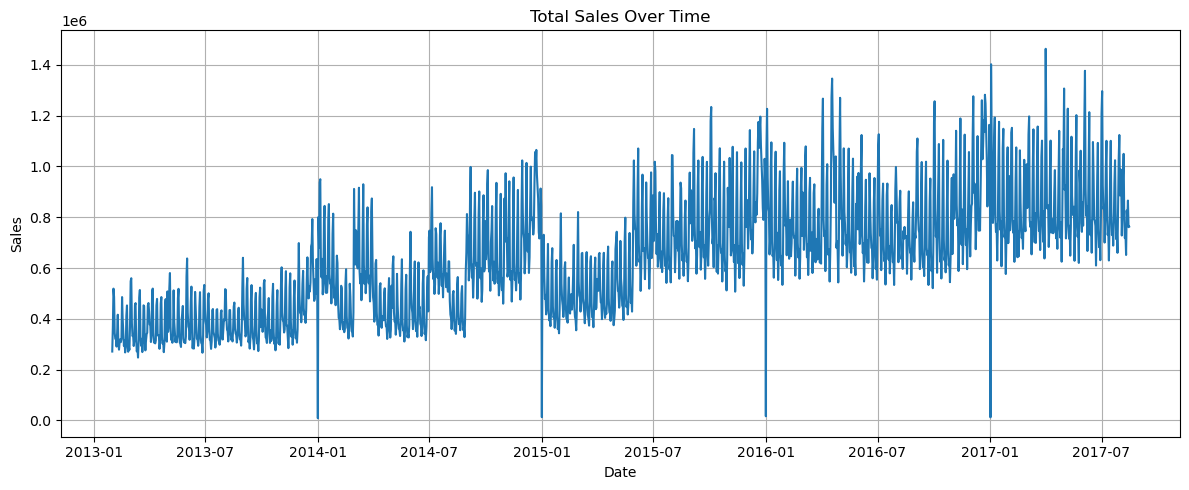

In [355]:
import matplotlib.pyplot as plt

# Aggregate total daily sales
daily_sales = train_final.groupby('date')['sales'].sum()

plt.figure(figsize=(12, 5))
plt.plot(daily_sales.index, daily_sales.values)
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


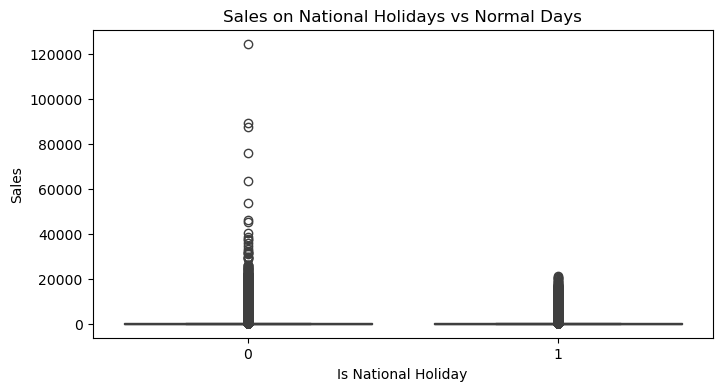

In [359]:
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(x='is_national_holiday', y='sales', data=train_final)
plt.title("Sales on National Holidays vs Normal Days")
plt.xlabel("Is National Holiday")
plt.ylabel("Sales")
plt.show()


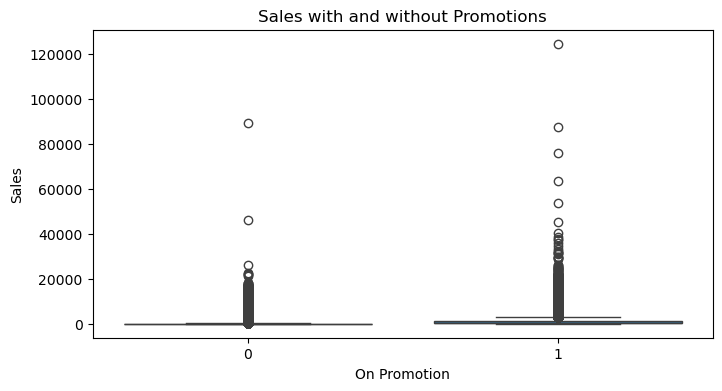

In [381]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='onpromotion', y='sales', data=train_final)
plt.title("Sales with and without Promotions")
plt.xlabel("On Promotion")
plt.ylabel("Sales")
plt.show()


In [377]:
train_final['onpromotion'].unique()

array([0, 1])

In [369]:
train_df['onpromotion'].value_counts()

onpromotion
0      2389559
1       174551
2        79386
3        45862
4        31659
        ...   
313          1
452          1
642          1
305          1
425          1
Name: count, Length: 362, dtype: int64

In [375]:
train_final['onpromotion'] = (train_final['onpromotion'] > 0).astype(int)


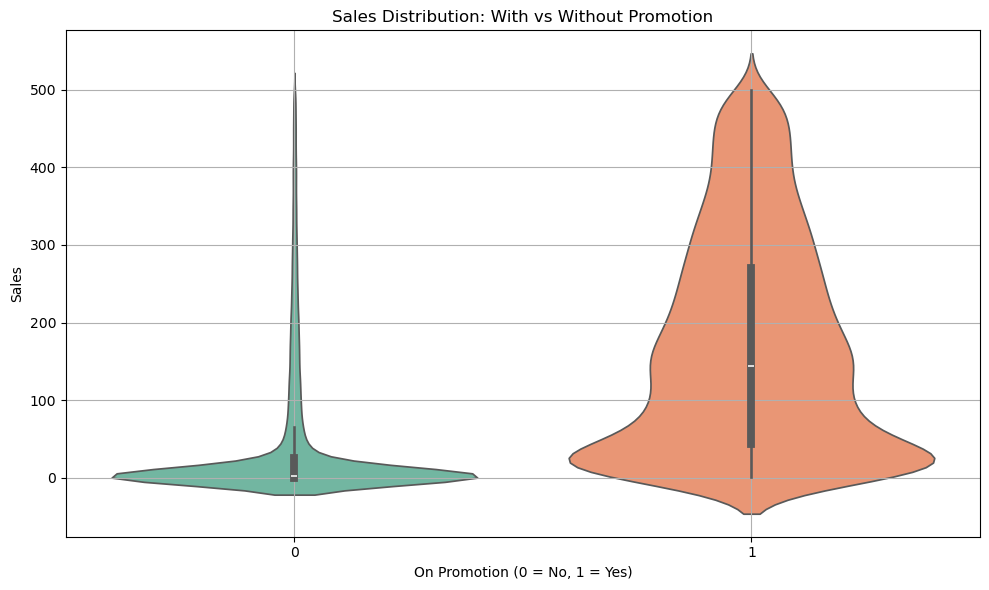

In [383]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: Filter extreme outliers for clearer plots
filtered = train_final[train_final['sales'] < 500]

plt.figure(figsize=(10, 6))
sns.violinplot(x='onpromotion', y='sales', data=filtered.sample(50000), palette='Set2', inner='box')
plt.title("Sales Distribution: With vs Without Promotion")
plt.xlabel("On Promotion (0 = No, 1 = Yes)")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


In [397]:
# Group by date: total daily sales
daily_sales = train_final.groupby('date')['sales'].sum().reset_index()

# Merge with oil prices
oil_df['dcoilwtico'] = oil_df['dcoilwtico'].interpolate(method='linear')

# Merge sales with oil
sales_oil = daily_sales.merge(oil_df, on='date', how='left')


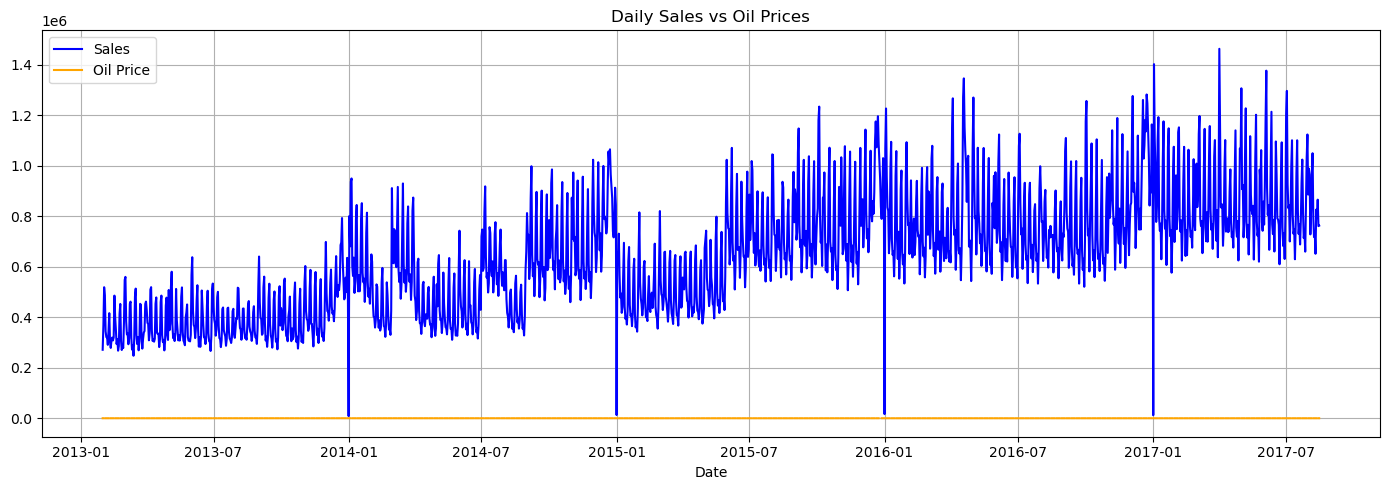

In [409]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(sales_oil['date'], sales_oil['sales'], label='Sales', color='blue')
plt.plot(sales_oil['date'], sales_oil['dcoilwtico'], label='Oil Price', color='orange')
plt.legend()
plt.title("Daily Sales vs Oil Prices")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()


In [403]:
train_final['sales'].describe()


count    2.947428e+06
mean     3.608531e+02
std      1.108317e+03
min      0.000000e+00
25%      0.000000e+00
50%      1.100000e+01
75%      1.980000e+02
max      1.247170e+05
Name: sales, dtype: float64

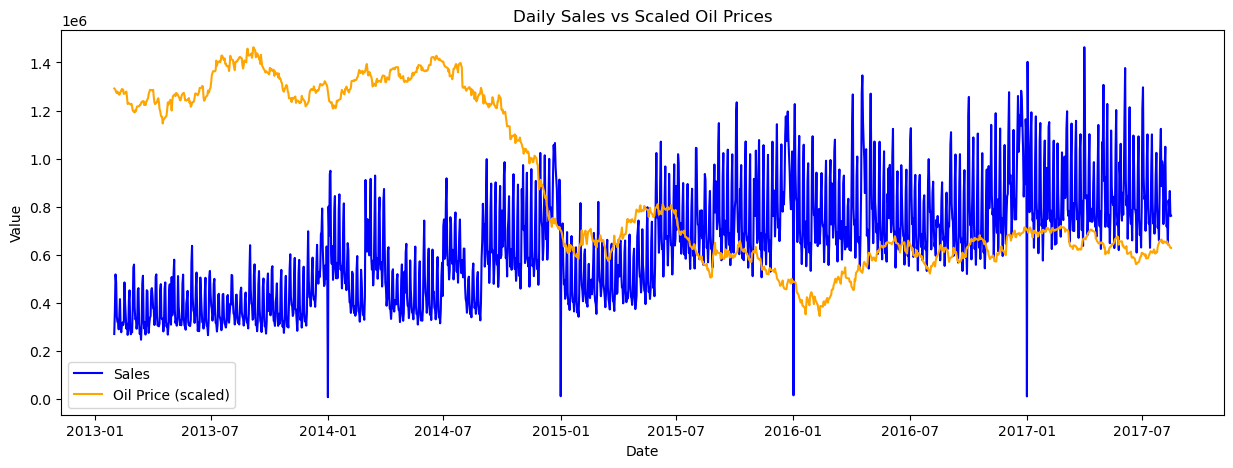

In [405]:
import matplotlib.pyplot as plt

daily_sales = train_final.groupby('date')['sales'].sum()
daily_oil = train_final.groupby('date')['dcoilwtico'].mean()

# Normalize oil for visibility
scaled_oil = daily_oil * (daily_sales.max() / daily_oil.max())

plt.figure(figsize=(15,5))
plt.plot(daily_sales.index, daily_sales, label='Sales', color='blue')
plt.plot(daily_oil.index, scaled_oil, label='Oil Price (scaled)', color='orange')
plt.title('Daily Sales vs Scaled Oil Prices')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:
#Anamolies in data

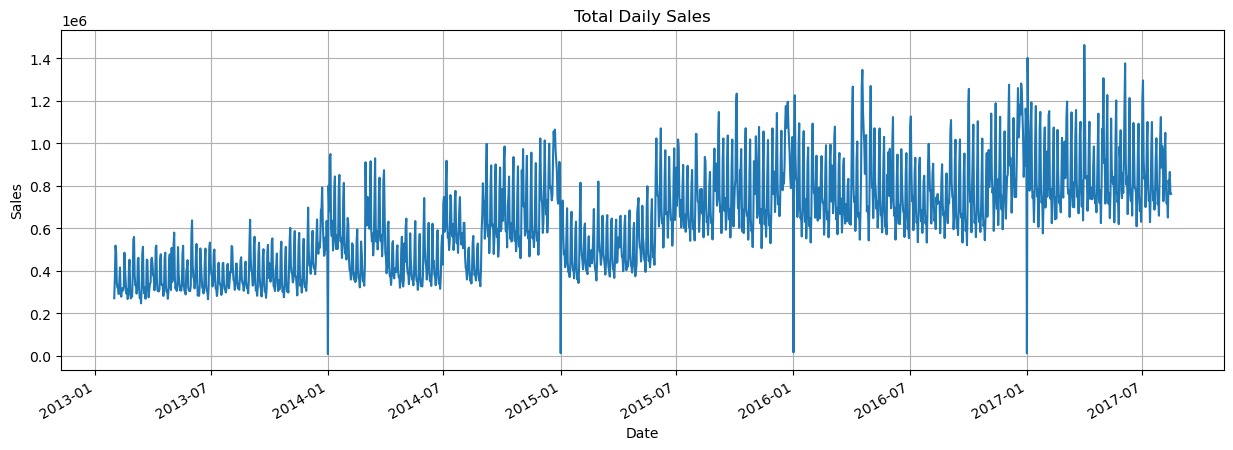

In [411]:
import matplotlib.pyplot as plt

train_final.groupby('date')['sales'].sum().plot(figsize=(15, 5), title='Total Daily Sales')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.grid(True)
plt.show()


In [ ]:
#Using Z-score

In [413]:
from scipy.stats import zscore

train_final['sales_zscore'] = zscore(train_final['sales'])
# Flag anomalies where Z-score > 3 or < -3
anomalies = train_final[train_final['sales_zscore'].abs() > 3]


In [415]:
anomalies

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,...,is_payday,earthquake,lag_7,lag_30,rolling_mean_7,rolling_std_7,rolling_mean_30,avg_sales_by_type,top_family_in_cluster,sales_zscore
6132,2138403,2016-04-18,1,BEVERAGES,4155.000,1,Quito,Pichincha,D,13,...,False,0,2177.00000,2302.0,1985.428571,232.578200,1920.900000,353.858624,1,3.423343
6133,2140185,2016-04-19,1,BEVERAGES,5051.000,1,Quito,Pichincha,D,13,...,False,0,1745.00000,1067.0,2268.000000,859.842040,1982.666667,353.858624,1,4.231776
6134,2141967,2016-04-20,1,BEVERAGES,4239.000,1,Quito,Pichincha,D,13,...,False,0,2342.00000,2149.0,2740.285714,1313.148470,2115.466667,353.858624,1,3.499133
6397,2610633,2017-01-09,1,BEVERAGES,4100.000,1,Quito,Pichincha,D,13,...,False,0,1434.00000,2741.0,2398.714286,716.842780,2343.866667,353.858624,1,3.373718
19240,1917443,2015-12-15,1,FROZEN FOODS,5608.718,0,Quito,Pichincha,D,13,...,True,0,219.83301,43.0,257.639573,101.909536,181.274600,353.858624,0,4.734988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914337,2982915,2017-08-05,54,GROCERY I,3821.000,1,El Carmen,Manabi,C,3,...,False,0,3565.00000,2313.0,3720.857143,1020.986684,3186.433333,198.856088,1,3.121985
2914338,2984697,2017-08-06,54,GROCERY I,4891.000,1,El Carmen,Manabi,C,3,...,False,0,5226.00000,2759.0,3757.428571,1019.056566,3236.700000,198.856088,1,4.087413
2914344,2995389,2017-08-12,54,GROCERY I,4161.000,1,El Carmen,Manabi,C,3,...,False,0,3821.00000,2148.0,3529.000000,725.418270,3255.566667,198.856088,1,3.428756
2914345,2997171,2017-08-13,54,GROCERY I,4739.000,1,El Carmen,Manabi,C,3,...,False,0,4891.00000,2150.0,3577.571429,758.840751,3322.666667,198.856088,1,3.950268


In [417]:
train_final['earthquake_impact'] = (train_final['date'] == '2016-04-16').astype(int)


In [488]:
train_final

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,...,rolling_mean_7,rolling_std_7,rolling_mean_30,avg_sales_by_type,top_family_in_cluster,sales_zscore,family_enc,city_enc,state_enc,type_enc
0,53460,2013-01-31,1,0,0.000,0,18,12,3,13,...,3.142857,2.035401,2.266667,353.858624,0,-0.325587,0,18,12,3
1384398,54066,2013-01-31,26,12,1308.000,0,8,6,3,10,...,1364.285714,339.326644,1486.033333,353.858624,1,0.854582,12,8,6,3
1457174,54110,2013-01-31,27,23,0.000,0,4,6,3,1,...,0.000000,0.000000,0.000000,353.858624,0,-0.325587,23,4,6,3
1351318,54046,2013-01-31,25,25,78.000,0,20,13,3,1,...,92.714286,32.917646,87.600000,353.858624,0,-0.255210,25,20,13,3
1359588,54051,2013-01-31,25,30,0.000,0,20,13,3,1,...,0.000000,0.000000,0.000000,353.858624,1,-0.325587,30,20,13,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2999107,2017-08-15,1,1,0.000,0,18,12,3,13,...,0.000000,0.000000,0.000000,353.858624,0,-0.325587,1,18,12,3
1653,2999106,2017-08-15,1,0,4.000,0,18,12,3,13,...,4.142857,3.287784,4.800000,353.858624,0,-0.321978,0,18,12,3
41349,2999130,2017-08-15,1,24,274.176,0,18,12,3,13,...,246.075574,104.247723,299.984866,353.858624,0,-0.078206,24,18,12,3
18193,2999116,2017-08-15,1,10,131.000,0,18,12,3,13,...,115.285714,35.311539,130.300000,353.858624,0,-0.207389,10,18,12,3


In [490]:
zero_sales = train_final[(train_final['sales'] == 0) & (train_final['is_national_holiday'] == 0)]
spike_sales = train_final[(train_final['sales_zscore'] > 3) & (train_final['onpromotion'] == False)]


In [492]:
zero_sales

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,...,rolling_mean_7,rolling_std_7,rolling_mean_30,avg_sales_by_type,top_family_in_cluster,sales_zscore,family_enc,city_enc,state_enc,type_enc
0,53460,2013-01-31,1,0,0.0,0,18,12,3,13,...,3.142857,2.035401,2.266667,353.858624,0,-0.325587,0,18,12,3
1457174,54110,2013-01-31,27,23,0.0,0,4,6,3,1,...,0.000000,0.000000,0.000000,353.858624,0,-0.325587,23,4,6,3
1359588,54051,2013-01-31,25,30,0.0,0,20,13,3,1,...,0.000000,0.000000,0.000000,353.858624,1,-0.325587,30,20,13,3
1366204,54055,2013-01-31,26,1,0.0,0,8,6,3,10,...,0.000000,0.000000,0.000000,353.858624,0,-0.325587,1,8,6,3
1354626,54048,2013-01-31,25,27,0.0,0,20,13,3,1,...,0.000000,0.000000,0.000000,353.858624,0,-0.325587,27,20,13,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52927,2999137,2017-08-15,1,31,0.0,0,18,12,3,13,...,0.000000,0.000000,0.000000,353.858624,0,-0.325587,31,18,12,3
62851,2999473,2017-08-15,2,4,0.0,0,18,12,3,13,...,0.000000,0.000000,0.000000,353.858624,0,-0.325587,4,18,12,3
29771,2999123,2017-08-15,1,17,0.0,0,18,12,3,13,...,0.000000,0.000000,0.500000,353.858624,0,-0.325587,17,18,12,3
8269,2999110,2017-08-15,1,4,0.0,0,18,12,3,13,...,0.000000,0.000000,0.066667,353.858624,0,-0.325587,4,18,12,3


In [494]:
spike_sales

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,...,rolling_mean_7,rolling_std_7,rolling_mean_30,avg_sales_by_type,top_family_in_cluster,sales_zscore,family_enc,city_enc,state_enc,type_enc
2366874,54726,2013-01-31,44,12,4268.000,0,18,12,0,5,...,6309.000000,2084.254623,7921.400000,711.487262,1,3.525299,12,18,12,0
2421456,54759,2013-01-31,45,12,4545.000,0,18,12,0,11,...,6173.571429,2016.324697,6612.633333,711.487262,1,3.775228,12,18,12,0
2476038,54792,2013-01-31,46,12,4749.000,0,18,12,0,14,...,5629.571429,2446.468193,6093.466667,711.487262,1,3.959291,12,18,12,0
2530620,54825,2013-01-31,47,12,4829.000,0,18,12,0,14,...,6185.428571,2278.744234,6628.100000,711.487262,1,4.031472,12,18,12,0
2585202,54858,2013-01-31,48,12,3928.000,0,18,12,0,14,...,4688.142857,2284.268550,5112.500000,711.487262,1,3.218528,12,18,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1916971,2975118,2017-08-01,36,3,4359.000,0,11,6,4,10,...,3405.714286,818.472096,2957.833333,272.904116,1,3.607406,3,11,6,4
115765,2974887,2017-08-01,3,3,8192.000,0,18,12,3,8,...,8949.000000,2405.890965,9166.833333,353.858624,1,7.065804,3,18,12,3
403567,2986578,2017-08-07,8,12,4468.000,0,18,12,3,8,...,5287.285714,701.217207,5193.600000,353.858624,1,3.705753,12,18,12,3
388681,2986569,2017-08-07,8,3,4070.000,0,18,12,3,8,...,5016.285714,905.256817,4994.866667,353.858624,1,3.346650,3,18,12,3


In [510]:
trans_df['date']=pd.to_datetime(trans_df['date'])

In [512]:
train_final = train_final.merge(trans_df, on=['date', 'store_nbr'], how='left')


In [518]:
train_fin=train_final.drop(columns=['id'],inplace=True)


In [486]:
from sklearn.preprocessing import LabelEncoder
# Encode each column in place
train_final['family'] = LabelEncoder().fit_transform(train_final['family'])
train_final['city'] = LabelEncoder().fit_transform(train_final['city'])
train_final['state'] = LabelEncoder().fit_transform(train_final['state'])
train_final['type'] = LabelEncoder().fit_transform(train_final['type'])



In [427]:
#1 Naive
naive_preds = test_df.groupby(['store_nbr', 'family'])['sales'].shift(1).fillna(method='bfill')
naive_preds = naive_preds.clip(lower=0)
naive_rmsle = np.sqrt(mean_squared_log_error(y_test, naive_preds))



In [476]:
# 5. LSTM (Using TensorFlow)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# LSTM needs reshaped and normalized data
scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Reshape for LSTM [samples, time_steps, features]
X_train_lstm = scaled_X_train.reshape((scaled_X_train.shape[0], 1, scaled_X_train.shape[1]))
X_test_lstm = scaled_X_test.reshape((scaled_X_test.shape[0], 1, scaled_X_test.shape[1]))

lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mean_squared_logarithmic_error')
lstm_model.fit(X_train_lstm, y_train, epochs=5, batch_size=64, verbose=1)

lstm_preds = lstm_model.predict(X_test_lstm).flatten()
lstm_preds = np.clip(lstm_preds, 0, None)
lstm_rmsle = np.sqrt(mean_squared_log_error(y_test, lstm_preds))




Epoch 1/5
44383/44383 ━━━━━━━━━━━━━━━━━━━━ 65s 1ms/step - loss: 2.7657 
Epoch 2/5
44383/44383 ━━━━━━━━━━━━━━━━━━━━ 62s 1ms/step - loss: 0.4140
Epoch 3/5
44383/44383 ━━━━━━━━━━━━━━━━━━━━ 64s 1ms/step - loss: 0.3680
Epoch 4/5
44383/44383 ━━━━━━━━━━━━━━━━━━━━ 65s 1ms/step - loss: 0.3355
Epoch 5/5
44383/44383 ━━━━━━━━━━━━━━━━━━━━ 63s 1ms/step - loss: 0.3286
3342/3342 ━━━━━━━━━━━━━━━━━━━━ 2s 695us/step


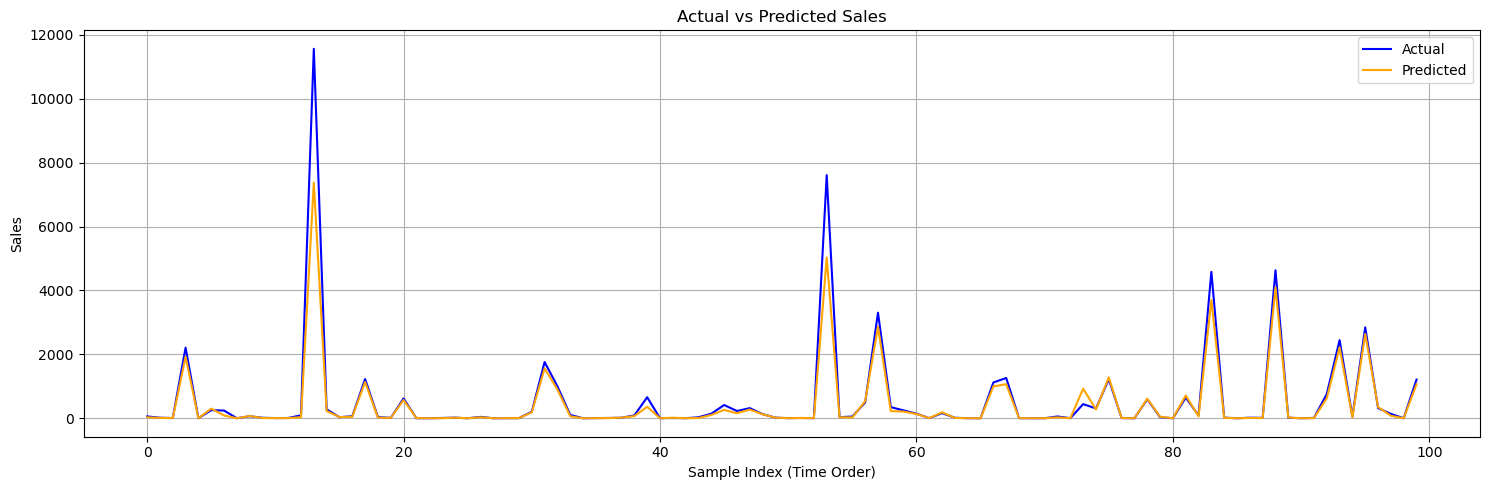

In [524]:
import matplotlib.pyplot as plt

# Select a sample of predictions for clarity
n = 100  # change to 200 or more for longer view
plt.figure(figsize=(15, 5))

plt.plot(y_test.values[:n], label='Actual', color='blue')
plt.plot(lstm_preds[:n], label='Predicted', color='orange')

plt.title("Actual vs Predicted Sales")
plt.xlabel("Sample Index (Time Order)")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


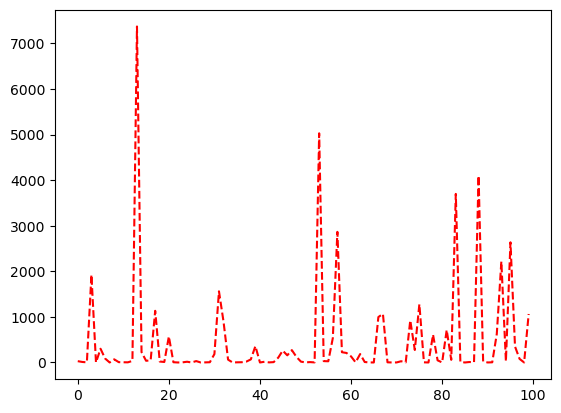

In [526]:
plt.plot(lstm_preds[:n], label='LSTM', linestyle='--', color='red')

In [478]:
lstm_rmsle

0.44128358628971687

In [444]:
print(f"Naive: {naive_rmsle:.4f}")

Naive: 0.8144


In [ ]:
#model needs tuning to get better results

In [528]:
test_df['predicted_sales'] = lstm_preds  


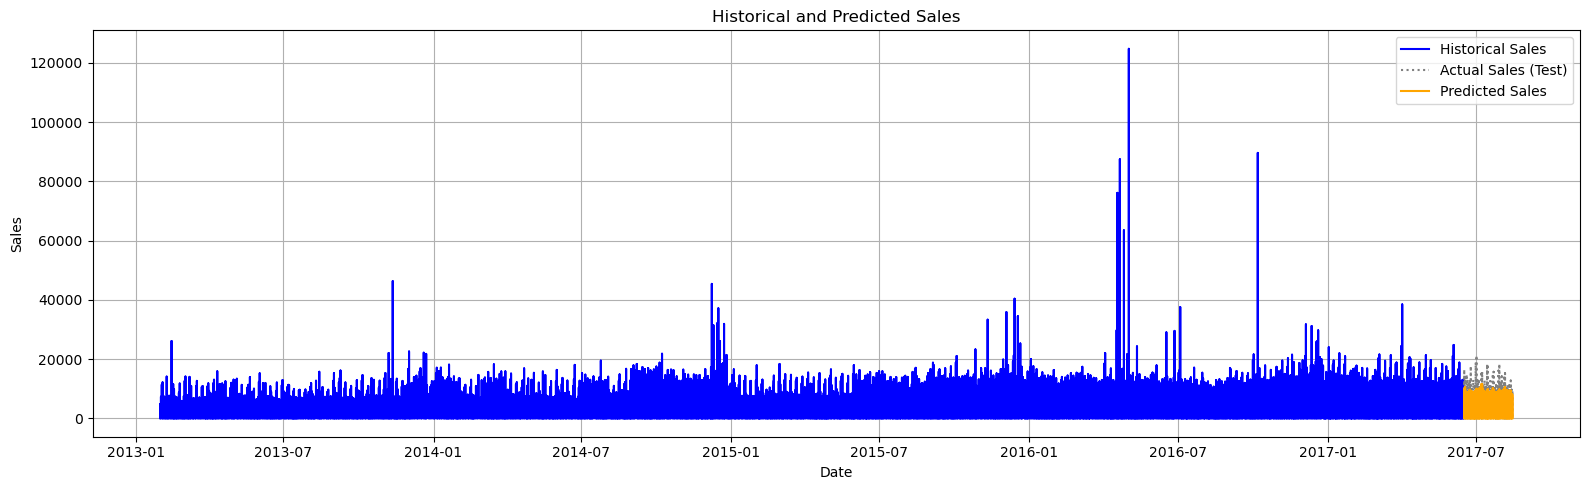

In [530]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 5))

# Plot historical sales
plt.plot(train_df['date'], train_df['sales'], label='Historical Sales', color='blue')

# Plot model predictions
plt.plot(test_df['date'], test_df['sales'], label='Actual Sales (Test)', color='gray', linestyle='dotted')
plt.plot(test_df['date'], test_df['predicted_sales'], label='Predicted Sales', color='orange')

plt.title('Historical and Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
